In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


5. How many rows and columns are in gdp_df? What are the data types of each column?

In [5]:
gdp_df.shape


(7662, 4)

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


Answers: 7662 rows & 4 columns - data types above 

6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df = gdp_df.rename(columns={"Country or Area":"Country", "Value":"GDP_Per_Capita"})

In [8]:
gdp_df = gdp_df.drop("Value Footnotes", axis=1)

In [9]:
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2021     1517.016266
1  Afghanistan  2020     1968.341002
2  Afghanistan  2019     2079.921861
3  Afghanistan  2018     2060.698973
4  Afghanistan  2017     2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

Answer: 
202 countries have data for all years
40 countries are missing dates
31 countries have less than 30 years recorded
There are less years recorded the smaller the country gets.

In [10]:
unique_years = gdp_df["Year"].unique() #find unique years
print(unique_years)

[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008
 2007 2006 2005 2004 2003 2002 2022 2001 2000 1999 1998 1997 1996 1995
 1994 1993 1992 1991 1990]


In [11]:
print(len(unique_years)) #counts number of years in unique years

33


In [12]:
count_years = gdp_df.groupby("Country").size().reset_index(name="Count") #groups

In [13]:
print(count_years) #count years by country

                         Country  Count
0                    Afghanistan     20
1    Africa Eastern and Southern     33
2     Africa Western and Central     33
3                        Albania     33
4                        Algeria     33
..                           ...    ...
237                     Viet Nam     33
238           West Bank and Gaza     29
239                        World     33
240                       Zambia     33
241                     Zimbabwe     33

[242 rows x 2 columns]


In [14]:
equal_33 = count_years[count_years.Count == 33]
print(len(equal_33)) #202 countries with all years recorded

202


In [15]:
not_33 = count_years[count_years.Count != 33]
count_not = len(not_33["Count"])
print(count_not) # 40 countries that do not have exactly 33 countries

40


In [16]:
not_33_sorted = not_33.sort_values("Count")
print(not_33_sorted)

                       Country  Count
53                    Djibouti     10
197                    Somalia     10
225   Turks and Caicos Islands     12
192  Sint Maarten (Dutch part)     14
112                     Kosovo     15
36              Cayman Islands     16
154                      Nauru     19
0                  Afghanistan     20
47                    CuraÃ§ao     22
213    SÃ£o TomÃ© and Principe     22
169                      Palau     22
166         Other small states     23
180                      Qatar     23
219                Timor-Leste     23
124                    Liberia     23
125                      Libya     24
185                 San Marino     25
149                 Montenegro     26
195               Small states     26
194                   Slovenia     28
188                     Serbia     28
126                  Lithuania     28
135                   Maldives     28
120                     Latvia     28
46                     Croatia     28
103         

In [17]:
not33_lessthan30 = not_33_sorted[not_33_sorted["Count"] < 30]
less_than_30 = len(not33_lessthan30["Count"])
print(less_than_30) # 31 countries have less than 30 years recorded

31


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Answer: Histograms and density plots show distributions, while the violin plot and the box plot show summary and shape of the distributions.

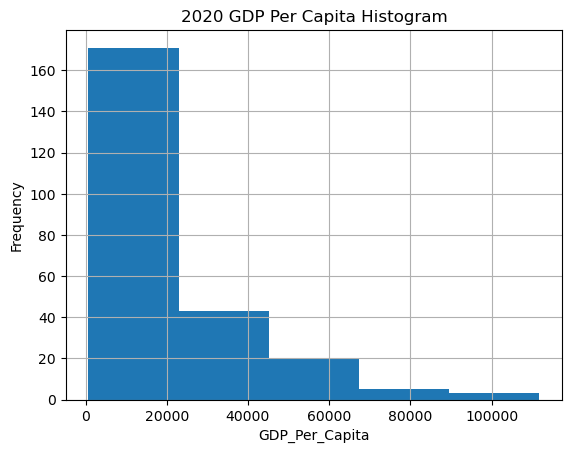

In [18]:
gdp_2020 = gdp_df[gdp_df["Year"]==2020] #subset year to 2020

gdp_2020["GDP_Per_Capita"].hist(bins=5)

plt.title("2020 GDP Per Capita Histogram")
plt.xlabel("GDP_Per_Capita")
plt.ylabel("Frequency")

plt.show()

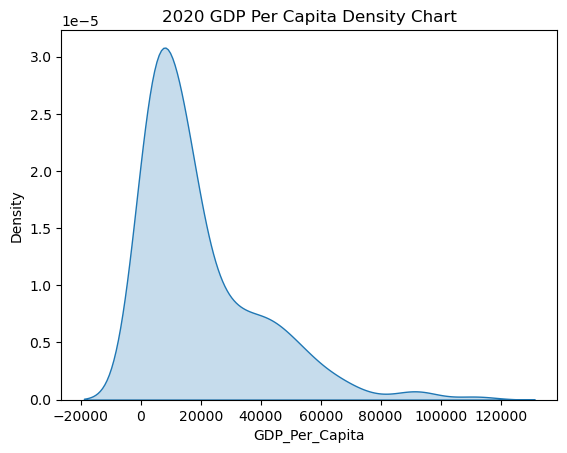

In [19]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)
plt.title("2020 GDP Per Capita Density Chart")
plt.show()

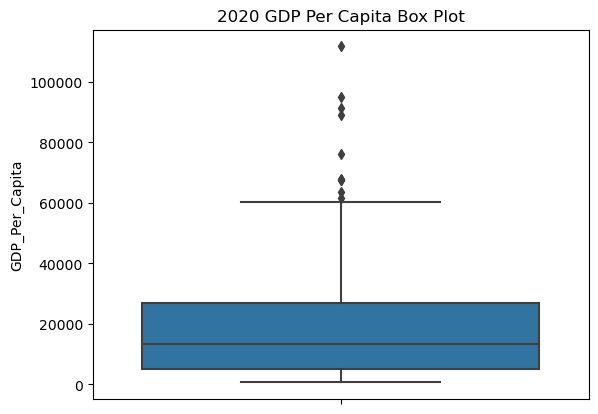

In [20]:
sns.boxplot(y=gdp_2020["GDP_Per_Capita"])
plt.title("2020 GDP Per Capita Box Plot")
plt.show()

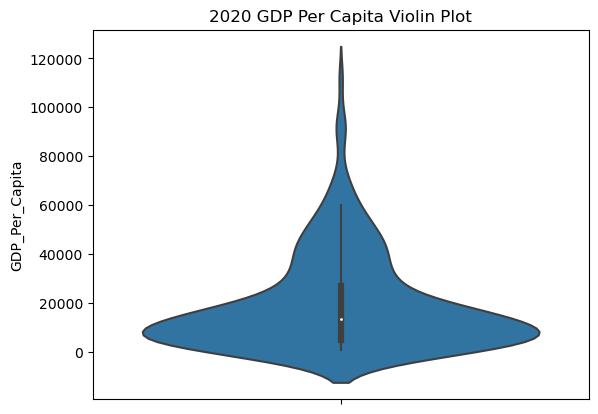

In [21]:
sns.violinplot(y=gdp_2020["GDP_Per_Capita"])
plt.title("2020 GDP Per Capita Violin Plot")
plt.show()

9. What was the median GDP per capita value in 2020?

In [22]:
print(gdp_2020["GDP_Per_Capita"].median())

13357.997573370474


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [50]:
gdp_decades = gdp_df[gdp_df["Year"].isin([1990, 2000, 2010, 2020])] #subset for specified years
print(gdp_decades.head())

                        Country  Year  GDP_Per_Capita
1                   Afghanistan  2020     1968.341002
11                  Afghanistan  2010     2026.163818
22  Africa Eastern and Southern  2020     3455.023119
32  Africa Eastern and Southern  2010     3513.315920
42  Africa Eastern and Southern  2000     2897.140841


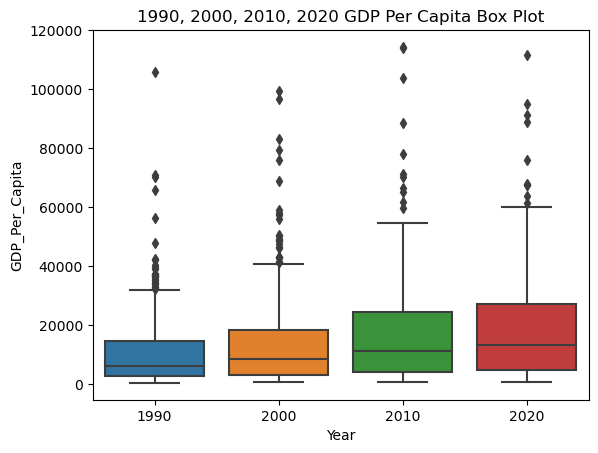

In [24]:
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.title("1990, 2000, 2010, 2020 GDP Per Capita Box Plot")
plt.show()

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

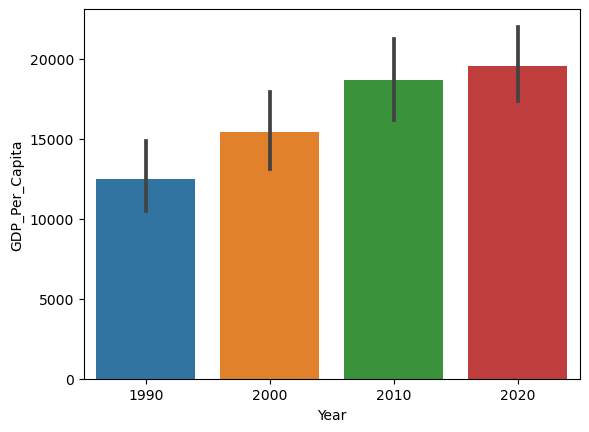

In [59]:
sns.barplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

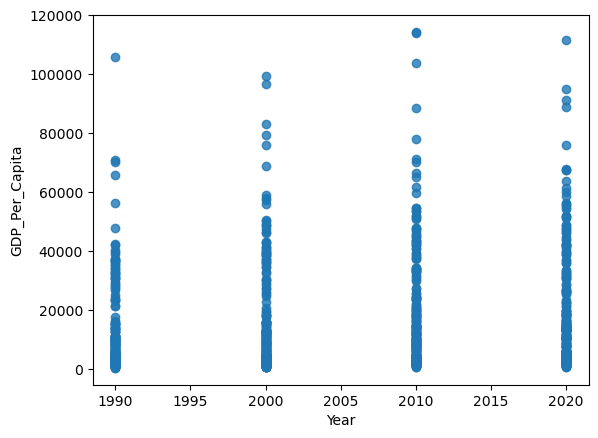

In [74]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], fit_reg=False)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

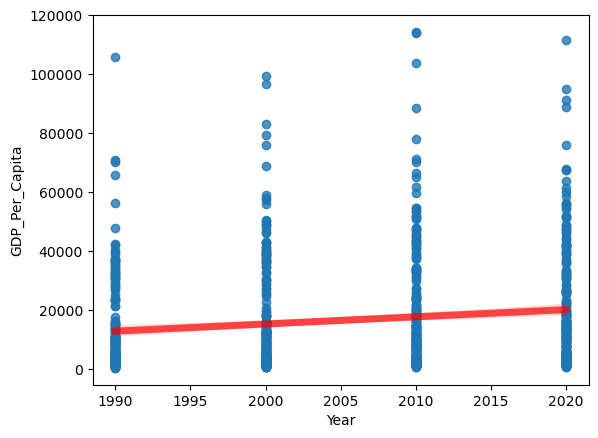

In [76]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})

11. Which country was the first to have a GDP per capita greater than $100,000?

Answer: United Arab Emirates

In [32]:
over_10k = gdp_df[gdp_df["GDP_Per_Capita"]>=100000].sort_values("Year")
print(over_10k)

                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990   105893.626059
7301  United Arab Emirates  1991   101048.696239
7295  United Arab Emirates  1997   100956.706467
4167            Luxembourg  2001   101143.147977
4166            Luxembourg  2002   103317.331098
4165            Luxembourg  2003   104743.000088
4164            Luxembourg  2004   107634.837198
4163            Luxembourg  2005   108632.360016
4162            Luxembourg  2006   113346.035782
4161            Luxembourg  2007   120647.822959
4160            Luxembourg  2008   118154.667184
4159            Luxembourg  2009   112230.081410
5756                 Qatar  2010   103902.519310
4158            Luxembourg  2010   114343.988089
4191      Macao SAR, China  2010   114042.495308
4190      Macao SAR, China  2011   135365.387353
5755                 Qatar  2011   111879.747777
4157            Luxembourg  2011   112998.390477
4189      Macao SAR, China  2012   144891.341893
5754                

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [82]:
gdp_2020 = gdp_2020.sort_values("GDP_Per_Capita", ascending=False) #sort by descending 
print(gdp_2020) #Luxembourg 

                       Country  Year  GDP_Per_Capita
4148                Luxembourg  2020   111751.314751
6108                 Singapore  2020    94910.101431
3279                   Ireland  2020    91356.855054
5746                     Qatar  2020    89019.069857
681                    Bermuda  2020    76117.804744
...                        ...   ...             ...
5074                     Niger  2020     1214.546556
6273                   Somalia  2020     1127.418534
1630           Dem. Rep. Congo  2020     1044.071214
1217  Central African Republic  2020      847.765012
973                    Burundi  2020      711.355263

[242 rows x 3 columns]


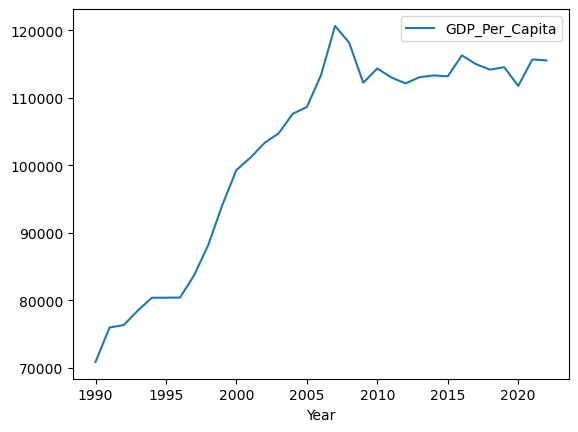

In [85]:
gdp_lux = gdp_df[gdp_df["Country"] == "Luxembourg"]
gdp_lux.plot(x="Year", y="GDP_Per_Capita")
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

                       Country  Year  GDP_Per_Capita
973                    Burundi  2020      711.355263
1217  Central African Republic  2020      847.765012
1630           Dem. Rep. Congo  2020     1044.071214
6273                   Somalia  2020     1127.418534
5074                     Niger  2020     1214.546556
...                        ...   ...             ...
681                    Bermuda  2020    76117.804744
5746                     Qatar  2020    89019.069857
3279                   Ireland  2020    91356.855054
6108                 Singapore  2020    94910.101431
4148                Luxembourg  2020   111751.314751

[242 rows x 3 columns]


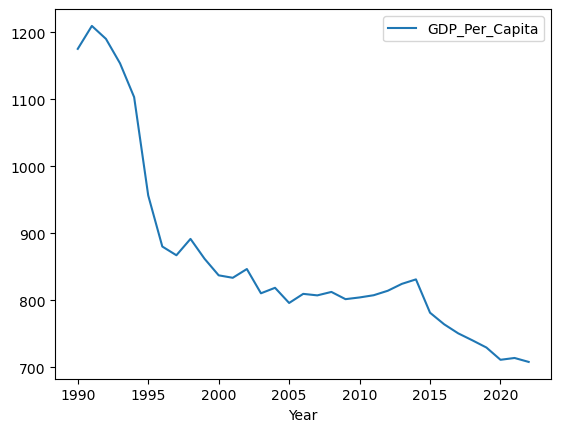

In [88]:
gdp_2020 = gdp_2020.sort_values("GDP_Per_Capita") #sort ascending
print(gdp_2020) #burundi

gdp_bur = gdp_df[gdp_df["Country"] == "Burundi"]
gdp_bur.plot(x="Year", y="GDP_Per_Capita")
plt.show()

**Bonus question:** 
Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 
Which countries had lower GDP per capita in 2020 than in 1990?

In [105]:
#Part 1 answer
gdp_1990 = gdp_df[gdp_df["Year"]==1990]
mean_1990 = gdp_1990["GDP_Per_Capita"].mean()
mean_2020 = gdp_2020["GDP_Per_Capita"].mean()
print(mean_1990)
print(mean_2020)
print(mean_1990 > mean_2020)

12506.08837386169
19586.754445561965
False


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

16. Look at the number of observations in this dataset per year. What do you notice?

17. What is the first year to have a non-zero internet users percentage value?

18. How does the distribution of internet users percent differ for 2000 and 2014?

19. For how many countries was the percentage of internet users below 5% in 2014?

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [ ]:
22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

bonus:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.